In [1]:
import zipfile
import pandas as ps
import numpy as pn
import seaborn as sns
import matplotlib .pyplot as mt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
with zipfile.ZipFile(r"C:\Users\Harshit\Downloads\164941767717660ec2379f8793842aa5b168a_.zip") as x:
    with x.open(r"5 Decision Tree + Random Forest + Ensemble Techniques/admission.csv") as v:
        fd = ps.read_csv(v)
fd.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
fd.shape

(500, 9)

In [4]:
fd.isnull().sum()/len(fd)*100

Serial No.           0.0
GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

In [5]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
fd.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
# a) Visualize 10 random rows of the dataset
print("10 Random Rows of the Dataset:")
print(fd.sample(10))

10 Random Rows of the Dataset:
     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
217         218        321          109                  4  4.0   4.0  9.13   
477         478        309          105                  4  3.5   2.0  8.18   
466         467        314           99                  4  3.5   4.5  8.73   
158         159        306          106                  2  2.0   2.5  8.14   
198         199        311          104                  3  4.5   4.5  8.43   
151         152        332          116                  5  5.0   5.0  9.28   
491         492        297           99                  4  3.0   3.5  7.81   
348         349        302           99                  1  2.0   2.0  7.25   
196         197        306          105                  2  3.0   2.5  8.26   
199         200        313          107                  3  4.0   4.5  8.69   

     Research  Chance of Admit   
217         1              0.85  
477         0              0.65

In [8]:
# b) Generate the description for numeric variables
print("\nDescription for Numeric Variables:")
print(fd.describe())


Description for Numeric Variables:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.8000

In [9]:
# c) Check the shape of the dataset
print("\nShape of the Dataset:")
print(fd.shape)


Shape of the Dataset:
(500, 9)


In [10]:
# d) Generate the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = fd.corr()
print(correlation_matrix)


Correlation Matrix:
                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.103839    -0.141696          -0.067641   
GRE Score           -0.103839   1.000000     0.827200           0.635376   
TOEFL Score         -0.141696   0.827200     1.000000           0.649799   
University Rating   -0.067641   0.635376     0.649799           1.000000   
SOP                 -0.137352   0.613498     0.644410           0.728024   
LOR                 -0.003694   0.524679     0.541563           0.608651   
CGPA                -0.074289   0.825878     0.810574           0.705254   
Research            -0.005332   0.563398     0.467012           0.427047   
Chance of Admit      0.008505   0.810351     0.792228           0.690132   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial No.        -0.137352 -0.003694 -0.074289 -0.005332          0.008505  
GRE Score          0.613498  0.524679  0.825878  0.563398     


Correlogram (Correlation Heatmap):


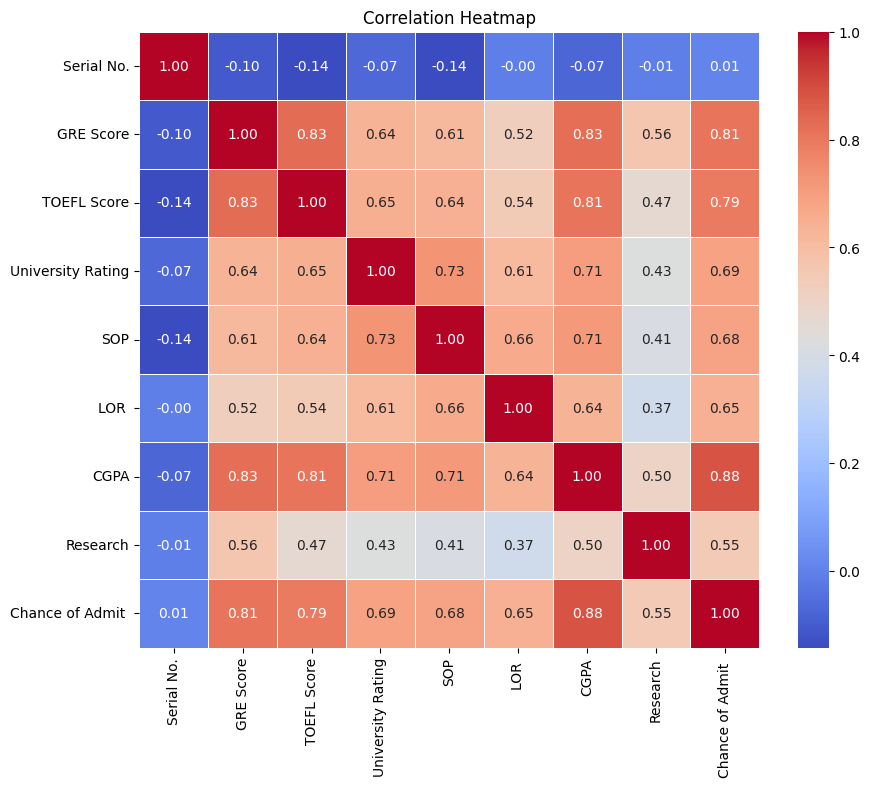

In [11]:
# e) Generate a correlogram (correlation heatmap)
print("\nCorrelogram (Correlation Heatmap):")
mt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
mt.title("Correlation Heatmap")
mt.show()

In [12]:
# Q.2 Find out the minimum and maximum values for GRE
# score

# Find the minimum and maximum GRE scores
min_gre_score = fd['GRE Score'].min()
max_gre_score = fd['GRE Score'].max()

In [13]:
print("Minimum GRE Score:", min_gre_score)
print("Maximum GRE Score:", max_gre_score)

Minimum GRE Score: 290
Maximum GRE Score: 340


In [14]:
# Q.3 Find out the percentage of universities for each
# university rating 

# Calculate the frequency of each university rating
university_rating_counts = fd['University Rating'].value_counts()

In [15]:
# Calculate the total number of universities
total_universities = len(fd)

In [16]:
# Calculate the percentage of universities for each university rating
percentage_per_rating = (university_rating_counts / total_universities) * 100

In [17]:
# Display the result
print("Percentage of universities for each university rating:")
print(percentage_per_rating)

Percentage of universities for each university rating:
University Rating
3    32.4
2    25.2
4    21.0
5    14.6
1     6.8
Name: count, dtype: float64


In [18]:
# Q.4
# Convert the target variable “Chance of Admit” to
# categorical having values 0 and 1,such that :
# Students having the “Chance of Admit” value > 0.80, are assigned
# value 1, and
# Students having the “Chance of Admit” value < 0.80, are assigned
# value 0
# Where 0: Low chance of Admission and 1: High chance of
# admission

In [19]:
print(fd.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [20]:
import pandas as pd

# function to convert the chance of admit value to 0 or 1
def convert_to_categorical(chance_of_admit):
    return 1 if chance_of_admit > 0.80 else 0

# function to create the new categorical column
fd['Admission Category'] = fd['Chance of Admit '].apply(lambda x: convert_to_categorical(x))

print(fd.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   Admission Category  
0         1              0.92                   1  
1         1              0.76                   0  
2         1              0.72                   0  
3         1              0.80                   0  
4         0              0.65                   0  


In [21]:
fd.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission Category
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [22]:
# Q.5 Build a Decision Tree classifier, to predict whether a
# student has a low or high chance of admission to a chosen
# university. Perform Hyperparameter Tuning to improve
# the accuracy of the model.

In [23]:
X = fd.drop(columns=['Chance of Admit ', 'Admission Category'])
y = fd['Admission Category']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

In [26]:
# Define the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [27]:
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [28]:
# Get the best hyperparameters from the tuning process
best_params = grid_search.best_params_

In [29]:
# Build the Decision Tree classifier with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)

In [30]:
# Train the classifier with the training data
best_dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=2,
                       min_samples_split=5)

In [31]:
# Make predictions on the test data
y_pred = best_dt_classifier.predict(X_test)

In [33]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        73
           1       0.86      0.89      0.87        27

    accuracy                           0.93       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.93      0.93      0.93       100

Confusion Matrix:
[[69  4]
 [ 3 24]]


In [34]:
# Q.6 Build a Random Forest classifier, to predict whether a
# student has a low or high chance of admission to a chosen
# university.

In [35]:
# Prepare the data by separating features (X) and the target variable (y)
X = fd.drop(columns=['Chance of Admit ', 'Admission Category'])
y = fd['Admission Category']

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

In [38]:
# Train the classifier with the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [40]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rf)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.92      0.89      0.91        27

    accuracy                           0.95       100
   macro avg       0.94      0.93      0.94       100
weighted avg       0.95      0.95      0.95       100

Confusion Matrix:
[[71  2]
 [ 3 24]]


In [41]:
# Q.7 Also use Ensemble Modelling techniques, to predict
# whether a student has a low or high chance of admission
# to a chosen university

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

# Prepare the data by separating features (X) and the target variable (y)
X = fd.drop(columns=['Chance of Admit ', 'Admission Category'])
y = fd['Admission Category']

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

In [45]:
# Train the classifier with the training data
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [46]:
# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

In [48]:
# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier Accuracy:", accuracy_gb)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Gradient Boosting Classifier Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        73
           1       0.96      0.89      0.92        27

    accuracy                           0.96       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.96      0.96      0.96       100

Confusion Matrix:
[[72  1]
 [ 3 24]]


In [49]:
model_comparison = ps.DataFrame({
    "Model": ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    "Accuracy": [accuracy_dt, accuracy_rf, accuracy_gb],
})

print(model_comparison)

               Model  Accuracy
0      Decision Tree      0.93
1      Random Forest      0.95
2  Gradient Boosting      0.96


In [ ]:
# As we can clearly see that Gradient Boosting has highest accuracy from others.